In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras as k
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


data = pd.read_csv('D:\Python\Online Contest\default of credit card clients.csv')
print(data.head())
print(data.describe())

Using TensorFlow backend.


   Unnamed: 0      X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  X11    X12    X13  \
0           1   20000   2   2   1  24   2   2  -1  -1   -2   -2   3913   3102   
1           2  120000   2   2   2  26  -1   2   0   0    0    2   2682   1725   
2           3   90000   2   2   2  34   0   0   0   0    0    0  29239  14027   
3           4   50000   2   2   1  37   0   0   0   0    0    0  46990  48233   
4           5   50000   1   2   1  57  -1   0  -1   0    0    0   8617   5670   

     X14    X15    X16    X17   X18    X19    X20   X21   X22   X23  Y  
0    689      0      0      0     0    689      0     0     0     0  1  
1   2682   3272   3455   3261     0   1000   1000  1000     0  2000  1  
2  13559  14331  14948  15549  1518   1500   1000  1000  1000  5000  0  
3  49291  28314  28959  29547  2000   2019   1200  1100  1069  1000  0  
4  35835  20940  19146  19131  2000  36681  10000  9000   689   679  0  
         Unnamed: 0              X1            X2            X3            

In [2]:
data.isnull().any()

Unnamed: 0    False
X1            False
X2            False
X3            False
X4            False
X5            False
X6            False
X7            False
X8            False
X9            False
X10           False
X11           False
X12           False
X13           False
X14           False
X15           False
X16           False
X17           False
X18           False
X19           False
X20           False
X21           False
X22           False
X23           False
Y             False
dtype: bool

In [25]:
#print(len(data))
data = data.astype(float)
train_x = data.iloc[:,:data.shape[1]-1]
train_y = data.iloc[:,data.shape[1]-1]
#train_x.dtypes

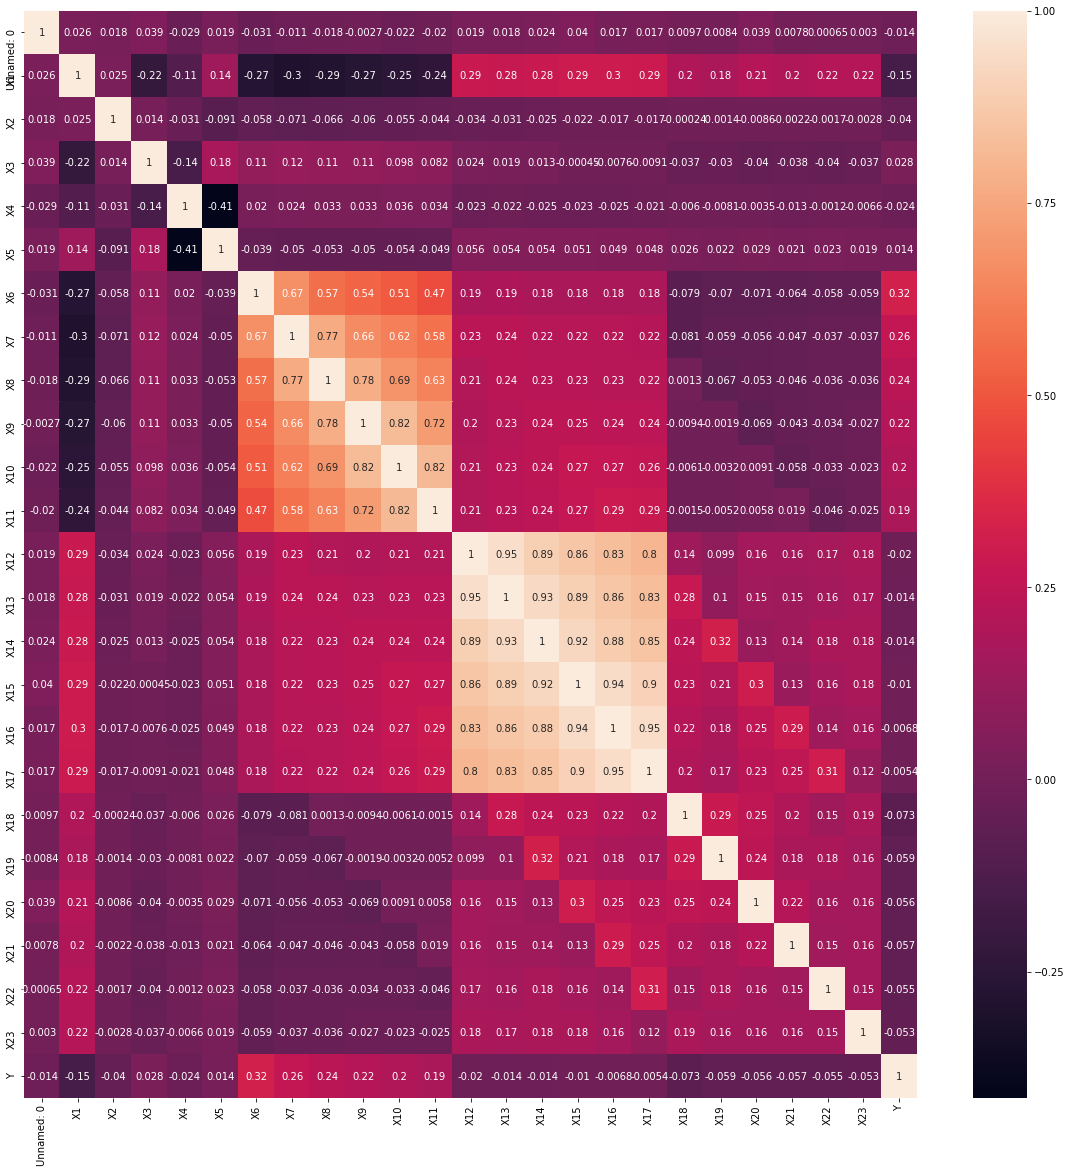

In [4]:
fg,ax = plt.subplots(figsize=(20,20))
corr = data.corr()
sns.heatmap(corr,annot=True,ax=ax)

In [60]:
from sklearn.decomposition import PCA
l=[]
for i in range (train_x.shape[1]):
    pca = PCA(n_components=i+1)
    pca.fit(train_x)
    l.append([i,sum(pca.explained_variance_ratio_)])
df1 = pd.DataFrame(l,columns=['n','variance'])
df1

,n,variance
0,0,0.609432
1,1,0.904299
2,2,0.934773
3,3,0.951674
4,4,0.961080
5,5,0.970111
6,6,0.977644
7,7,0.984020
8,8,0.989847
9,9,0.992814


In [61]:
for i in range(df1.shape[0]-1,0,-1):
    df1.iloc[i,1] = df1.iloc[i,1] - df1.iloc[i-1,1]

1.0 0.999999999996
23
0.999999999996 0.999999999992
22
0.999999999992 0.999999999986
21
0.999999999986 0.99999999998
20
0.99999999998 0.999999999973
19
0.999999999973 0.999999999961
18
0.999999999961 0.999999999948
17
0.999999999948 0.999999999929
16
0.999999999929 0.999999999835
15
0.999999999835 0.999999998007
14
0.999999998007 0.998556039853
13
0.998556039853 0.996895525002
12
0.996895525002 0.995197061389
11
0.995197061389 0.992813523086
10
0.992813523086 0.989847125014
9
0.989847125014 0.984019630813
8
0.984019630813 0.977643735741
7
0.977643735741 0.970110849969
6
0.970110849969 0.961080230285
5
0.961080230285 0.951674337461
4
0.951674337461 0.934773252878
3
0.934773252878 0.904299265044
2
0.904299265044 0.609432169348
1


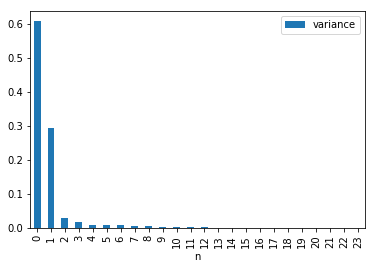

In [63]:
df1.plot(kind='bar',x='n',y='variance')

In [66]:
pca = PCA(n_components=6)
pca.fit(train_x)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [70]:
df2 = pd.DataFrame(pca.transform(train_x))

In [71]:
df2.head()

,0,1,2,3,4,5
0,-166511.133757,-75548.896212,-502.028232,-213.245509,523.769673,306.442699
1,-114249.888151,9769.791632,2705.067817,-1642.835663,-3877.688732,1052.305632
2,-98455.339023,-33482.291583,-2707.888860,-5177.930523,3528.330788,487.267413
3,-71253.751337,-95235.221934,-10077.106079,4343.901316,-435.687229,6533.307432
4,-114857.599637,-68740.031104,24575.975635,34180.307405,8389.633023,4955.293592


In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(df2))



StandardScaler(copy=True, with_mean=True, with_std=True)


In [79]:
df2 = pd.DataFrame(scaler.transform(df2))

In [81]:
train_x = df2

In [83]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
print(svc.score(train_x,train_y))

0.7797


In [94]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=5,verbose=1)

clf.fit(train_x,train_y)
print(clf.score(train_x,train_y))

-- Epoch 1
Norm: 3.52, NNZs: 6, Bias: -2.825532, T: 30000, Avg. loss: 1.484183
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.48, NNZs: 6, Bias: -1.649836, T: 60000, Avg. loss: 0.674702
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.42, NNZs: 6, Bias: -1.247571, T: 90000, Avg. loss: 0.582758
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 6, Bias: -1.264492, T: 120000, Avg. loss: 0.544684
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.73, NNZs: 6, Bias: -1.194841, T: 150000, Avg. loss: 0.522055
Total training time: 0.02 seconds.
0.7788


In [98]:
from sklearn.neighbors import KNeighborsClassifier
list1=[]
for i in range (1,11):
    clf2 = KNeighborsClassifier(n_neighbors=i)
    clf2.fit(train_x,train_y)
    list1.append(clf2.score(train_x,train_y))
print(list1)


[1.0, 0.84550000000000003, 0.84986666666666666, 0.81899999999999995, 0.81893333333333329, 0.80823333333333336, 0.80933333333333335, 0.80246666666666666, 0.80286666666666662, 0.79823333333333335]


In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

param = {'max_depth':[1,3,6]}
clf3 = GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=KFold(5))
clf3.fit(train_x,train_y)
print(clf3.best_score_) 

0.7788


In [114]:
from sklearn.model_selection import validation_curve
train_score, validation_score = validation_curve(DecisionTreeClassifier(),train_x,train_y,'max_depth',range(1,16))

print(train_score)

[[ 0.7788   0.7788   0.7788 ]
 [ 0.7788   0.7788   0.7788 ]
 [ 0.7788   0.7791   0.7788 ]
 [ 0.77905  0.7791   0.77915]
 [ 0.7798   0.78     0.77985]
 [ 0.78475  0.7818   0.783  ]
 [ 0.79015  0.7847   0.78585]
 [ 0.7961   0.78965  0.79145]
 [ 0.80445  0.79905  0.80035]
 [ 0.8156   0.80885  0.8076 ]
 [ 0.82735  0.82245  0.8204 ]
 [ 0.8413   0.83725  0.83455]
 [ 0.8623   0.8509   0.8511 ]
 [ 0.8802   0.8673   0.8661 ]
 [ 0.8997   0.8836   0.8828 ]]


In [115]:
train_score

array([[ 0.7788 ,  0.7788 ,  0.7788 ],
       [ 0.7788 ,  0.7788 ,  0.7788 ],
       [ 0.7788 ,  0.7791 ,  0.7788 ],
       [ 0.77905,  0.7791 ,  0.77915],
       [ 0.7798 ,  0.78   ,  0.77985],
       [ 0.78475,  0.7818 ,  0.783  ],
       [ 0.79015,  0.7847 ,  0.78585],
       [ 0.7961 ,  0.78965,  0.79145],
       [ 0.80445,  0.79905,  0.80035],
       [ 0.8156 ,  0.80885,  0.8076 ],
       [ 0.82735,  0.82245,  0.8204 ],
       [ 0.8413 ,  0.83725,  0.83455],
       [ 0.8623 ,  0.8509 ,  0.8511 ],
       [ 0.8802 ,  0.8673 ,  0.8661 ],
       [ 0.8997 ,  0.8836 ,  0.8828 ]])

In [116]:
validation_score

array([[ 0.7788,  0.7788,  0.7788],
       [ 0.7788,  0.7788,  0.7788],
       [ 0.7788,  0.7785,  0.7788],
       [ 0.7785,  0.7785,  0.7779],
       [ 0.7781,  0.777 ,  0.7779],
       [ 0.7723,  0.7759,  0.7751],
       [ 0.7702,  0.776 ,  0.7724],
       [ 0.7712,  0.7702,  0.7692],
       [ 0.7658,  0.7684,  0.7664],
       [ 0.7615,  0.7601,  0.7655],
       [ 0.7544,  0.7601,  0.7612],
       [ 0.7501,  0.7529,  0.75  ],
       [ 0.7289,  0.7471,  0.7463],
       [ 0.7347,  0.7361,  0.7412],
       [ 0.7222,  0.7308,  0.7385]])

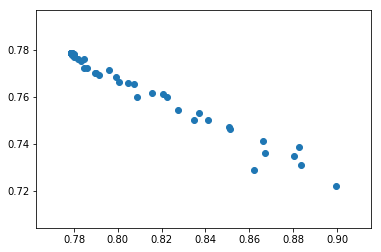

In [121]:
plt.scatter(train_score.reshape(1,45),validation_score.reshape(1,45))